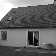

In [88]:
from IPython.display import display,Image

display(Image(filename="/Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/10002302//images/image1.jpg"))

In [89]:
import os
import numpy as np
from scipy import ndimage


image_size = 56  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def load_img(folder):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      image_data = (ndimage.imread(image_file).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      #if image_data.shape != (image_size, image_size):
        #raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset

In [90]:
example_path = "/Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/10002302/images/"

load_img(example_path)

/Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/10002302/images/
('Full dataset tensor:', (3, 56, 56))
('Mean:', -0.040738795)
('Standard deviation:', 0.2177446)


array([[[ 0.49607843,  0.48039216,  0.48431373, ...,  0.30392158,
         -0.35490197, -0.30784315],
        [ 0.48823529,  0.48039216,  0.46862745, ...,  0.2647059 ,
         -0.06470589, -0.02156863],
        [ 0.48823529,  0.48431373,  0.47254902, ...,  0.09215686,
         -0.09215686, -0.03333334],
        ..., 
        [-0.31568629, -0.28823531, -0.30392158, ..., -0.24901961,
         -0.24509804, -0.22941177],
        [-0.24509804, -0.30000001, -0.30392158, ..., -0.31568629,
         -0.31176472, -0.3392157 ],
        [-0.29607844, -0.28823531, -0.28039217, ..., -0.30392158,
         -0.33529413, -0.30784315]],

       [[ 0.36274511,  0.35882354,  0.34705883, ...,  0.46078432,
          0.46078432,  0.47254902],
        [ 0.34705883,  0.36666667,  0.34705883, ...,  0.44509804,
          0.44901961,  0.43725491],
        [ 0.42941177,  0.40196079,  0.39019608, ...,  0.44901961,
          0.44901961,  0.44901961],
        ..., 
        [-0.18627451, -0.23333333, -0.23333333, ...,

In [228]:
def maybe_pickle(data_folders, force=True):
  dataset_names = []
  for folder in data_folders:
    set_filename = folder + '.pickle'
    dataset_names.append(set_filename)
    if os.path.exists(set_filename) and not force:
      # You may override by setting force=True.
      print('%s already present - Skipping pickling.' % set_filename)
    else:
      print('Pickling %s.' % set_filename)
      dataset = load_img(folder)
      try:
        with open(set_filename, 'wb') as f:
          pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
      except Exception as e:
        print('Unable to save data to', set_filename, ':', e)
  
  return dataset_names

In [92]:
def dirNames(path):
    dirNameList = []
    for f in os.listdir(path):
        child = os.path.join(path, f)
        if os.path.isdir(child):
            dirNameList.append(child)
    return dirNameList

def imgDir(func,path):
    imageDir = []
    for dirName in dirNames(path):
        imageDir.append(dirName + "/images")
    return imageDir

path_city = "/Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/"
pathesList = imgDir(dirNames,path_city)



In [94]:
trainPath = pathesList[0:2]
trainPath

['/Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/10002302/images',
 '/Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/10048894/images']

In [95]:
maybe_pickle(trainPath)

Pickling /Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/10002302/images.pickle.
/Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/10002302/images
('Full dataset tensor:', (3, 56, 56))
('Mean:', -0.040738795)
('Standard deviation:', 0.2177446)
Pickling /Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/10048894/images.pickle.
/Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/10048894/images
('Full dataset tensor:', (1, 56, 56))
('Mean:', 0.058088239)
('Standard deviation:', 0.14656831)


['/Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/10002302/images.pickle',
 '/Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/10048894/images.pickle']

In [96]:
train_datasets = maybe_pickle(trainPath)

/Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/10002302/images.pickle already present - Skipping pickling.
/Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/10048894/images.pickle already present - Skipping pickling.


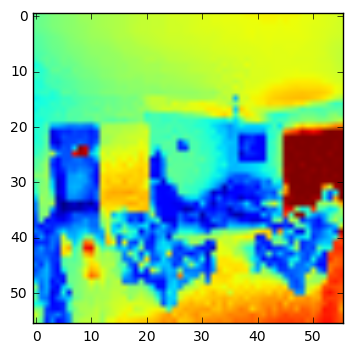

In [97]:
from six.moves import cPickle as pickle
import matplotlib.pyplot as plt

pickle_file = train_datasets[0]  # index 0 should be all As, 1 = all Bs, etc.
with open(pickle_file, 'rb') as f:
    house_set = pickle.load(f)  # unpickle
    sample_idx = np.random.randint(len(house_set))  # pick a random image index
    sample_image = house_set[sample_idx, :, :]  # extract a 2D slice
    plt.figure()
    plt.imshow(sample_image) 
    plt.show()

In [226]:
# build the labels (price of properties)

import csv

path_csv_adverts = "/Users/alex/Documents/pythonProjects/opencvTraining/advertsInfo.csv" 

info_labels = []

with open(path_csv_adverts, 'rb') as f:
    reader = csv.reader(f, delimiter=',')
    for row in reader:
         info_labels.append(row)
            
info_labels = info_labels[1:len(info_labels)]
            
list_Adverts_Path = []
for path in pathesList :
    list_Adverts_Path.append(int(path.replace('/Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/','').replace('/images','').replace('-','')))
 

price_labels = [float(info_labels[i][5]) for i in range(len(info_labels))]


print "nombre de repertoires avec images exploitable: " , len(list_Adverts_Path)
int(float(info_labels[1][0]))
print "nombre de repertoires avec fichier json exploitable" , len(info_labels)



nombre de repertoires avec images exploitable:  654
nombre de repertoires avec fichier json exploitable 654


[328500.0,
 183700.0,
 104980.0,
 162500.0,
 113800.0,
 22000.0,
 171000.0,
 172000.0,
 178000.0,
 875500.0,
 232000.0,
 150000.0,
 161766.0,
 175833.0,
 900000.0,
 132368.0,
 139000.0,
 115900.0,
 146500.0,
 108500.0,
 171842.0,
 168900.0,
 127000.0,
 124500.0,
 12000.0,
 114000.0,
 198000.0,
 783690.0,
 133500.0,
 76500.0,
 695000.0,
 328000.0,
 94000.0,
 298500.0,
 675350.0,
 120000.0,
 187000.0,
 158000.0,
 141000.0,
 395000.0,
 176440.0,
 97200.0,
 657000.0,
 165000.0,
 132800.0,
 149980.0,
 177105.0,
 731300.0,
 160000.0,
 214000.0,
 142000.0,
 216000.0,
 320000.0,
 308000.0,
 226000.0,
 242000.0,
 294000.0,
 306000.0,
 220000.0,
 326000.0,
 314000.0,
 232000.0,
 302000.0,
 312000.0,
 382000.0,
 220000.0,
 312000.0,
 236000.0,
 250000.0,
 308000.0,
 316000.0,
 326000.0,
 240000.0,
 334000.0,
 354000.0,
 466000.0,
 102000.0,
 99000.0,
 450000.0,
 104000.0,
 120000.0,
 218100.0,
 272200.0,
 163000.0,
 131500.0,
 208500.0,
 705000.0,
 780000.0,
 599000.0,
 725000.0,
 270000.0,
 2907

In [243]:
# construct de datasets

path_city = "/Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/"
pathesList = imgDir(dirNames,path_city)

trainPath = pathesList
train_datasets = maybe_pickle(trainPath)

numberOfAdverts = len(pathesList)
print numberOfAdverts

path_csv_adverts = "/Users/alex/Documents/pythonProjects/opencvTraining/advertsInfo.csv" 

adverts_info = csv.reader(path_csv_adverts)


Pickling /Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/10002302/images.pickle.
/Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/10002302/images
('Full dataset tensor:', (3, 56, 56))
('Mean:', -0.040738795)
('Standard deviation:', 0.2177446)
Pickling /Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/10048894/images.pickle.
/Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/10048894/images
('Full dataset tensor:', (1, 56, 56))
('Mean:', 0.058088239)
('Standard deviation:', 0.14656831)
Pickling /Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/10063478/images.pickle.
/Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/10063478/images
('Full dataset tensor:', (4, 56, 56))
('Mean:', 0.020688904)
('Standard deviation:', 0.27168041)
Pickling /Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/10063774/images.pickle.
/Users/alex/Docume

TypeError: data type not understood

In [338]:

def make_arrays(nb_rows, img_size):
  if nb_rows:
    dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
    labels = np.ndarray(nb_rows, dtype=np.float32)
  else:
    dataset, labels = None, None
  return dataset, labels

def merge_datasets(pickle_files, train_size,price_labels):
    num_classes = len(pickle_files)
    train_dataset, train_labels = make_arrays(train_size, image_size)
    t_start = 0
    t_end = 0
    for i, pickle_file in enumerate(pickle_files):       
        try:
          with open(pickle_file, 'rb') as f:
            img_set = pickle.load(f)
            
            nb_imgs = len(img_set) 
            t_end += nb_imgs
            
            train_img = img_set
            train_dataset[:,:,:] = train_img
            train_labels[i] = price_labels[i]
            
            t_start += t_end
        
        except Exception as e:
          print('Unable to process data from', pickle_file, ':', e)
          raise
    
    return train_dataset, train_labels
            
            
train_size = numberOfAdverts*70/100
valid_size = numberOfAdverts - train_size

train_dataset, train_labels = merge_datasets(train_datasets, train_size,price_labels)

('Unable to process data from', '/Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/10002302/images.pickle', ':', ValueError('could not broadcast input array from shape (3,56,56) into shape (457,56,56)',))


ValueError: could not broadcast input array from shape (3,56,56) into shape (457,56,56)

In [230]:
print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)

('Training:', (457, 56, 56), (457,))
('Validation:', (197, 56, 56), (197,))


In [103]:
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels

train_dataset, train_labels = randomize(train_dataset, train_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

In [110]:
pickle_file = 'housingNantes.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [111]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

('Compressed pickle size:', 8206730)
